In [1]:
from pathlib import Path
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import dataretrieval.nwis as nwis

In [2]:
def get_nwis_data(sites: list[str], start: pd.Timestamp, end: pd.Timestamp) -> pd.DataFrame:
    """
    Query NWIS service to get site records
    """

    # Parse dates to strings for NWIS
    str_start = start.strftime(r"%Y-%m-%d")
    str_end = end.strftime(r"%Y-%m-%d")

    # get site information
    site_info, md = nwis.get_info(sites=sites)

    # get daily values (dv)
    df_daily = nwis.get_record(service="dv", sites=sites, start=str_start, end=str_end)

    # get instantaneous values (iv)
    df_iv = nwis.get_record(service="iv", sites=sites, start=str_start, end=str_end)

    # get parameter descriptions
    parameter_codes = list(
        set([col.partition("_")[0] for col in df_daily.columns if col[0].isdigit()])
    )

    df_parameter_descriptions = nwis.get_record(parameterCd=parameter_codes, service="pmcodes")

    return {
        "df_daily": df_daily,
        "df_instantaneous": df_iv,
        "site_info": site_info,
        "parameter_codes": df_parameter_descriptions,
    }

In [3]:
sites = [
    # "05536290",  # Little Calumer River at South Holland, IL
    "413548087395901",  # RAIN GAGE AT CALUMET UNION DR CANAL NR MARKHAM, IL
    "413516087442101",  # RAIN GAGE AT OAK FOREST, IL
    "413510087380201",  # RAIN GAGE AT HARVEY, IL
    "414028087383501",  # RAIN GAGE AT WEST PULLMAN AT CHICAGO, IL
    "414030087450001",  # RAIN GAGE AT ALSIP, IL
    "413104087440001",  # RIAN GAGE AT MATTESON, IL
    "415755087525300",  # OHARE AIRPORT AT CHICAGO, IL
]

start = pd.Timestamp("2021-04-01 00:00:00")
end = pd.Timestamp("2021-11-01 00:00:00")

In [4]:
# target folder
target_path = Path("usgs")
target_path.mkdir(exist_ok=True)

if (data_path := target_path / "data.pkl").exists():
    with open(data_path, "rb") as f:
        data = pickle.load(f)

else:
    data = get_nwis_data(sites=sites, start=start, end=end)
    with open(data_path, "wb") as f:
        pickle.dump(data, f)

In [5]:
daily, df, site_info, pcodes = data.values()

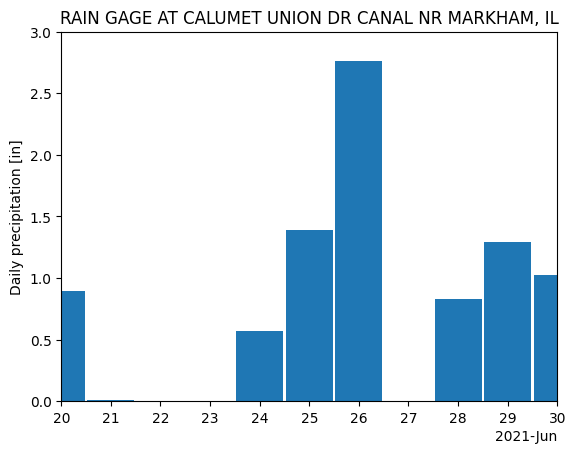

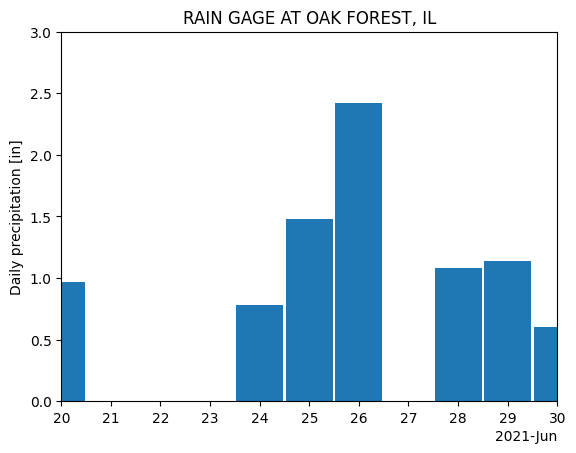

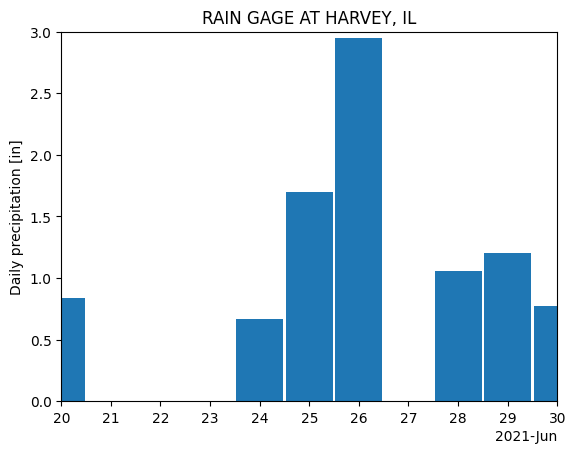

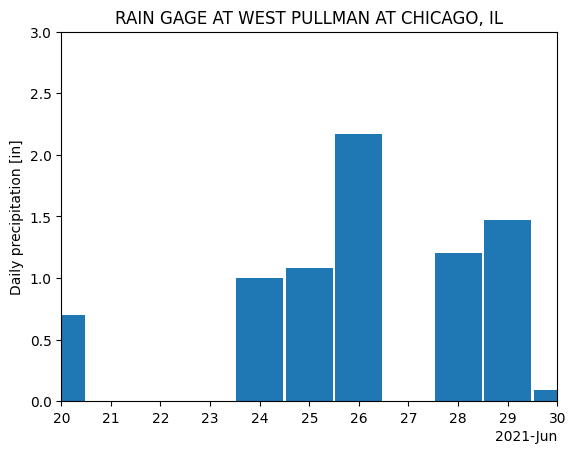

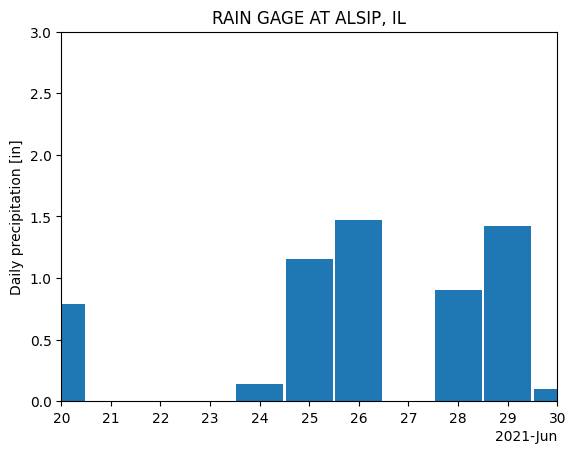

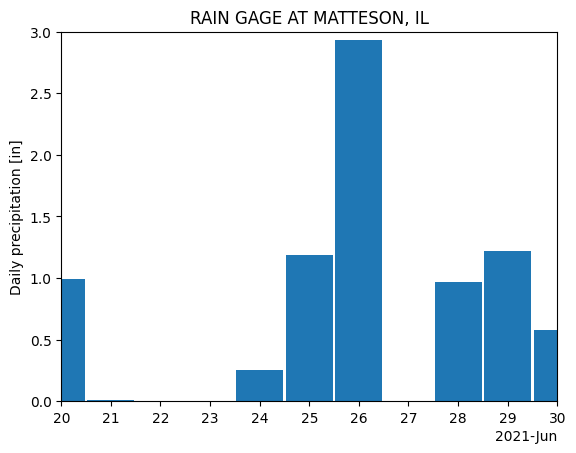

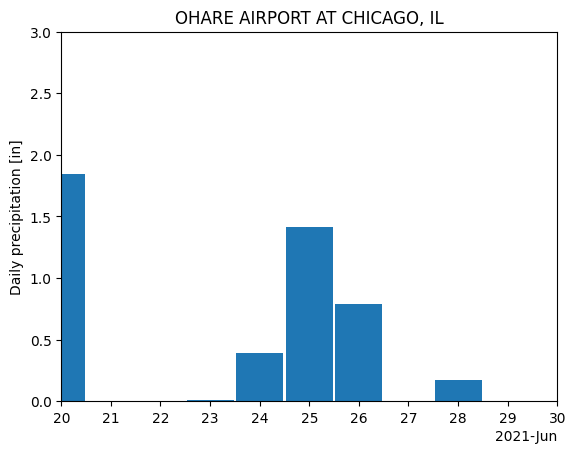

In [6]:
for site in sites:
    fig, ax = plt.subplots()
    subdf = daily.xs(site)["00045_Sum"]
    ax.bar(subdf.index, subdf, width=pd.Timedelta("0.95d"))
    ax.set_title(site_info.set_index("site_no").loc[site]["station_nm"])
    ax.set_xlim(pd.Timestamp("2021-06-20"), pd.Timestamp("2021-06-30"))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    ax.set_ylim(0, 3.0)
    ax.set_ylabel("Daily precipitation [in]")
    plt.show()

In [7]:
site_info

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,413104087440001,"RAIN GAGE AT MATTESON, IL",AT,413104,874400,41.517778,-87.733333,N,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAWS0,POINT (-87.73333 41.51778)
1,USGS,413510087380201,"RAIN GAGE AT HARVEY, IL",AT,413510,873802,41.586111,-87.633889,N,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAWS00,POINT (-87.63389 41.58611)
2,USGS,413516087442101,"RAIN GAGE AT OAK FOREST, IL",AT,413516,874421,41.587778,-87.739167,N,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAWS00,POINT (-87.73917 41.58778)
3,USGS,413548087395901,RAIN GAGE AT CALUMET UNION DR CANAL NR MARKHAM...,AT,413548,873959,41.596667,-87.666389,M,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001UM,POINT (-87.66639 41.59667)
4,USGS,414028087383501,"RAIN GAGE AT WEST PULLMAN AT CHICAGO, IL",AT,414028,873835,41.674444,-87.643056,N,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001CC,POINT (-87.64306 41.67444)
5,USGS,414030087450001,"RAIN GAGE AT ALSIP, IL",AT,414030,874500,41.675000,-87.750000,N,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAWS00,POINT (-87.75 41.675)
6,USGS,415755087525300,"OHARE AIRPORT AT CHICAGO, IL",AT,415755,875253,41.965308,-87.881453,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,11303,POINT (-87.88145 41.96531)


In [8]:
pcodes

,parameter_cd,group,parm_nm,epa_equivalence,result_statistical_basis,result_time_basis,result_weight_basis,result_particle_size_basis,result_sample_fraction,result_temperature_basis,CASRN,SRSName,parm_unit
0,00020,Physical,"Temperature, air, degrees Celsius",Agree,NaN,NaN,NaN,NaN,NaN,NaN,,"Temperature, air, deg C",deg C
0,00045,Physical,"Precipitation, total, inches",Agree,NaN,NaN,NaN,NaN,NaN,NaN,,Precipitation,in


In [9]:
from collections import namedtuple

Coord = namedtuple("Coord", ("lat", "lon", "name"))
coords = []
for site in sites:
    coords.append(
        Coord(
            site_info.set_index("site_no").loc[site]["dec_lat_va"],
            site_info.set_index("site_no").loc[site]["dec_long_va"],
            site_info.set_index("site_no").loc[site]["station_nm"],
        )
    )

In [37]:
from timeseries_point import extract_series, extract_point_value

In [38]:
ts_from_radar = {}

for coord in coords:
    ts = extract_series("20210626", coord.lat, coord.lon)
    ts.to_csv(f"timeseries/{coord.name}.txt")

    ts_from_radar[coord.name] = ts

In [41]:
ts_from_radar["RAIN GAGE AT ALSIP, IL"]

,value
timestamp,
2021-06-26 00:00:00,0.0
2021-06-26 00:10:00,0.0
2021-06-26 00:20:00,0.0
2021-06-26 00:30:00,0.0
2021-06-26 00:40:00,0.0
...,...
2021-06-26 23:10:00,1.7
2021-06-26 23:20:00,1.6
2021-06-26 23:30:00,2.0


In [45]:
site_info.set_index("station_nm").loc["RAIN GAGE AT OAK FOREST, IL"]["site_no"]

'413516087442101'

In [51]:
for coord in coords:
    code = site_info.set_index("station_nm").loc[coord.name]["site_no"]
    sub_df = df.loc[code]

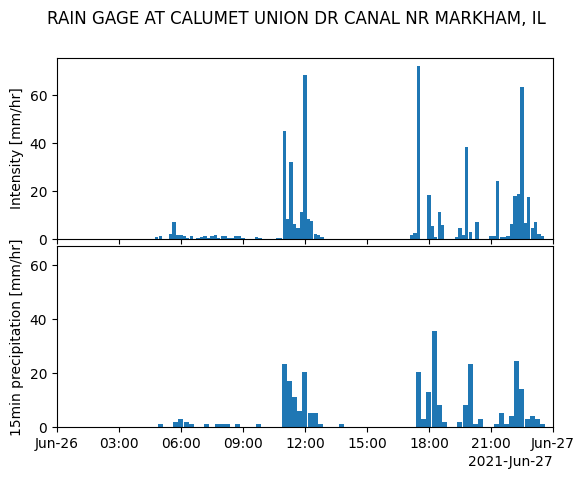

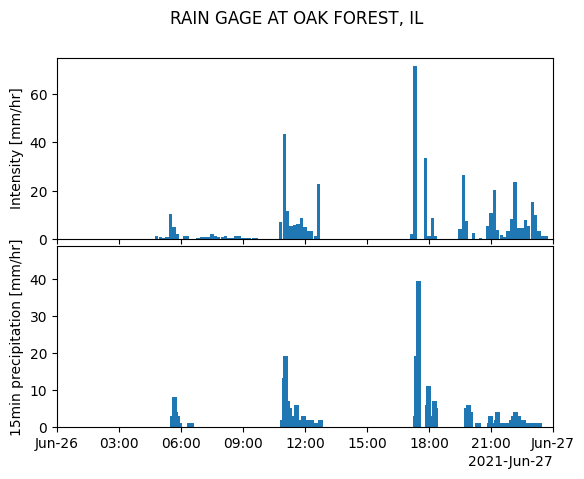

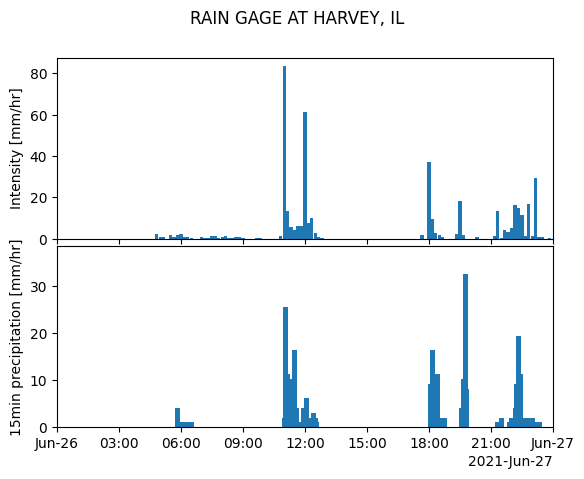

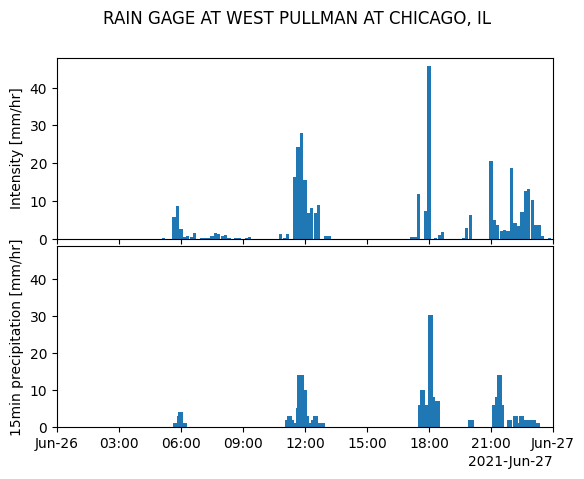

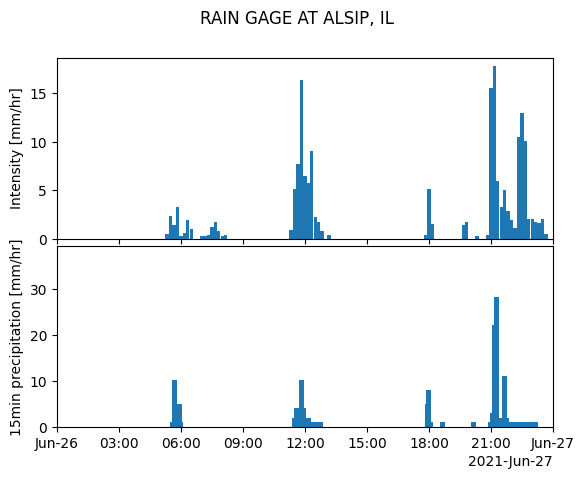

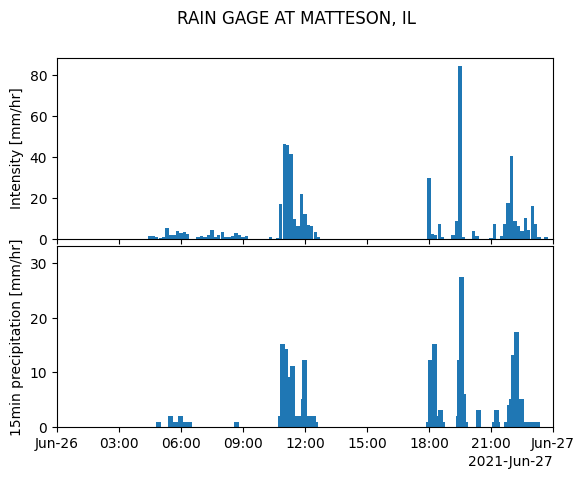

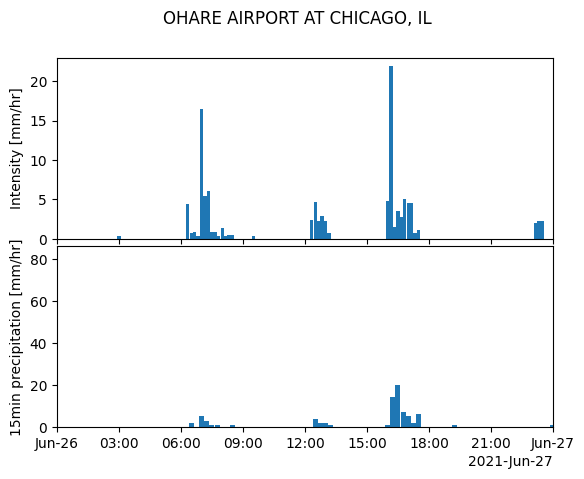

In [52]:
for (k, ts), coord in zip(ts_from_radar.items(), coords):
    fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"hspace": 0.04})
    ax = axs[0]
    fig.suptitle(k)
    ax.bar(ts.index, ts["value"].astype(float), width=pd.Timedelta("9.5m"))
    ax.set_ylabel("Intensity [mm/hr]")

    ax = axs[1]
    code = site_info.set_index("station_nm").loc[coord.name]["site_no"]
    sub_df = df.loc[code]
    ax.bar(sub_df.index, sub_df["00045"] * 25.4 / 0.25, width=pd.Timedelta("14.5m"))
    ax.set_ylabel("15min precipitation [mm/hr]")
    ax.set_xlim(pd.Timestamp("2021-06-26 00:00:00"), pd.Timestamp("2021-06-27 00:00:00"))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    plt.show()